## Sequential A/B-testing:  Sequential Probability Ratio Test (SPRT)

## Теория:

## Проблема подглядывания

Проблема подглядывания возникает из-за нарушения базовой логики ***Fixed Horizon*** способов проведения экспериментов. 
***Fixed Horizon*** - это этап, который мы должны достичь, чтобы остановить тест.

***Что нельзя делать при Fixed Horizon:***
* Смотреть на результаты по мере накопления данных (например, в середине теста), определять в этот момент p-value по текущей выборке и, если нашли p-value < alpha, то останавливать тест.
* Дождаться накопления выборки, увидеть, что статистической значимости нет, но все равно продолжать тест. А вдруг дальше появится результат?

***В обоих этих случаях возникнет классическая ошибка подглядывания ― peeking problem, но в первом случае она возникнет до достижения Fixed Horizon, а во втором ― после.***

Дождаться накопления выборки, увидеть, что статистической значимости нет, и тогда начать переделывать дизайн эксперимента: подбирать MDE, альфу и прочее так, чтобы отвергнуть нулевую гипотезу. Это уже ***p-hacking («взлом pvalue»)***, т.е. проведение статистических тестов на наборе данных до тех пор, пока не появятся некоторые статистически значимые результаты. Это можно сделать несколькими способами, например: остановив сбор данных, как только вы получите P<0,05, проанализировав множество результатов, но сообщив только те, у которых P<0,05, используя ковариаты, исключив участников и т. д..

## Проблема подглядывания:
***Первый вариант - мы подглядывали в эксперимент***
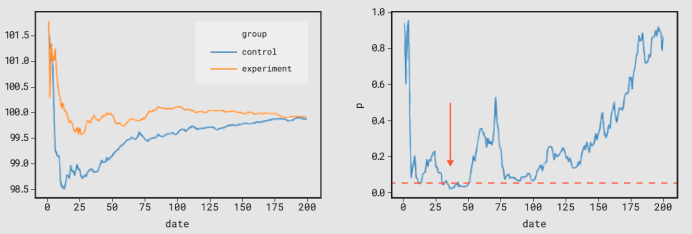
На 35 день теста мы останавливаем тест, т.к. кумулятивное p-value заходит за критическое значение и в итоге получаем ложноположительный результат.
Это классическая проблема подглядывания, из-за которой растет кумулятивная ошибка 1 рода (FWER)

***Второй вариант - мы не подглядываем***
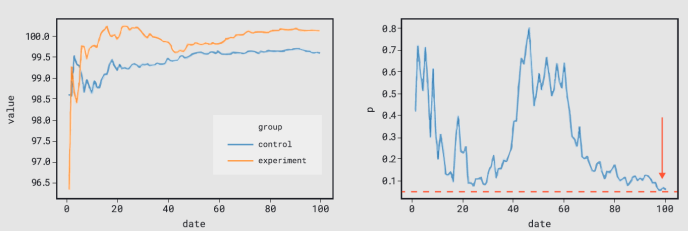
К концу эксперимента p-value зашел за критическое значение, поэтому мы снова отвергаем нулевую гипотезу. Это классический False Positive.
Но при Fixed Horizon таких случаев будет не больше 5% ― заложенный уровень альфа.

***Подглядывание будет полезно, если:***
* проведение конкретного A/B-теста затратно как по времени, так и по деньгам ― чем раньше закончится эксперимент, тем лучше
* есть положительный эффект от изменений ― откладывая внедрение на всех пользователей, мы упускаем выгоду
* эксперимент вредит пользователям ― мы можем потерять их лояльность
* есть большой бэклог экспериментов и нужно завершить тест раньше, чтобы можно было запустить новые эксперименты

### Решение проблемы подглядывания
* корректировка критических значений статистических критериев под то количество подглядываний в тесте, которое мы хотим запланировать (Pocock, O’Brien-Fleming, Haybittle-Peto)
* Sequential Probability Ratio Test (SPRT, критерий Вальда)
* Mixture sequential probability ratio test (mSPRT) ― дальнейшее развитие SPRT, которое используется для экспериментов в Optimizely
* Group sequential test (GST)
* Байесовское тестирование
* Corrected-alpha approach (CAA)

В **Sequential A/B Testing** (последовательное тестирование) — это метод, позволяющий непрерывно анализировать собранные данные и потенциально принимать решения относительно ваших экспериментов до достижения заранее определенного размера выборки.  

|            | **Frequentist A/B Testing**     | **Sequential A/B Testing**      | 
|-----------------------|------------------|--------------------------------------------------------------------------------------------------|
| **Время принятия решения** | Решения принимаются после достижения заранее определенного размера выборки. |Решения можно принимать по мере накопления данных, что потенциально экономит время и ресурсы.   | 
|    **Мониторинг данных**                   | Необходимо избегать промежуточного мониторинга данных, чтобы контролировать уровень ложноположительных результатов.   | Обеспечивает непрерывный мониторинг данных со статистическими корректировками для различных видов.         | 
| **Фокус** | Лучше всего подходит для небольших, постепенных эффектов, где точность имеет решающее значение. | Лучше всего подходит для крупных изменений, чтобы быстро определить существенные эффекты.  | 
|       **Варианты использования**                | Идеально подходит для тонкой настройки существующих функций, где критически важно точное измерение эффектов или в сценариях, где легко доступны большие объемы выборки . | Ценно для снижения рисков за счет раннего прекращения неудачных вариаций, что позволяет заинтересованным командам интуитивно просматривать результаты и экономит время при наличии значительных эффектов. | 

### Корректировка критических значений под количество подглядываний в тесте

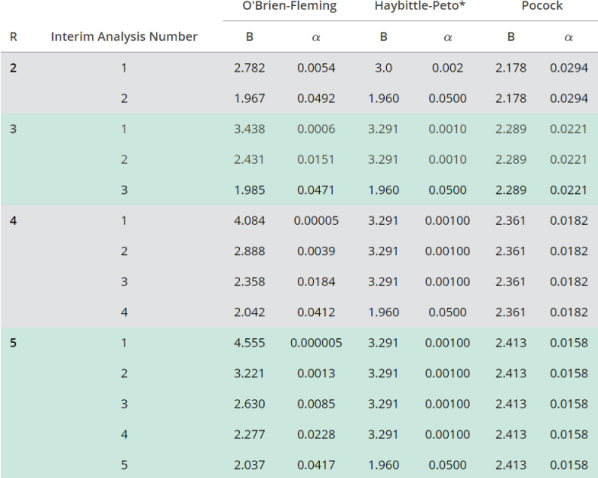

R- количество заложенных подглядываний

Interim Analysis Number - номер подглядывания

* Все три метода пытаются скорректировать критическое значение для принятия решения $Z_{cr}$ в новые критические границы $B_r$ (boundaries) для каждого шага подглядывания (r).
* Самый наивный и базовый подход ― увеличить Zcr для всех одинаково (Pocock boundaries).
* Другие методы делают шкалу принятия решений более прогрессивной, когда отклонить H0 гипотезу в первые подглядывания сложнее. Но по мере накопления данных мы становимся увереннее в выводах, а границы к последнему подглядыванию достигают (HaybittlePeto) или почти достигают (O’Brien-Fleming) изначальное значение альфа 0.05.
* Данные методики хороши тем, что они относительно просты в применении. Однако у них есть и ***недостаток***: мы можем останавливать тесты, только если увидим отклонение H0 гипотезы. Пока p-value или критическое значение статистики не превышает заданных границ, мы вынуждены продолжать наш эксперимент.
  
В идеале мы бы хотели подглядывать так, чтобы можно было бы как отклонить H0, так и понимать, что тест проводить
бесполезно, поскольку вероятнее верна H0. И такая схема проведения тестов существует ― это ***Wald's Sequential Probability
Ratio Test (SPRT)***.

### SPRT
SPRT относится к методикам последовательного тестирования (sequential A/B-testing).

Согласно методу, на каждом новом испытании мы принимаем решение и выбираем один из трех вариантов:
* принять Н0
* принять Н1
* провести еще испытание

SPRT рассчитывает границы «коридора» принятия решений и на каждом новом значении
выборки определяет, какой из вариантов выбрать.
SPRT можно использовать для проверки двух типов гипотез: о равенстве доли конкретному значению и о равенстве
средних.


SPRT основан на статистике отношения правдоподобия $λ_n$ . Тесты отношения правдоподобия крайне сложно выполнить вручную, поэтому необходимо программное обеспечение.

Чаще в SPRT работют с логарифмом правдоподобия (Log Likelihood Ratio - LLR), т.к. с ним упрощаются расчеты функции правдоподобия.

***Функция правдоподобия*** - вероятность получить все значения выборки при той или иной гипотезе.
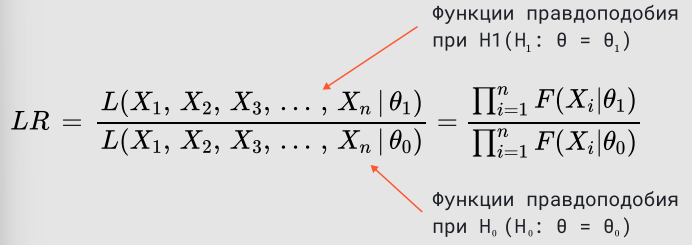

Визуализация принятия решения для LLR:
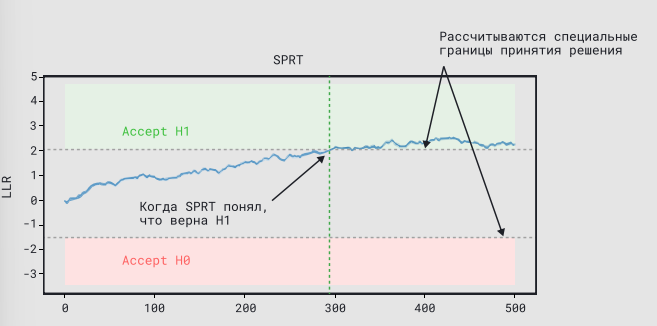

Визуализация принятия решения для кумулятивной суммы успехов (для проверки гипотез о долях):
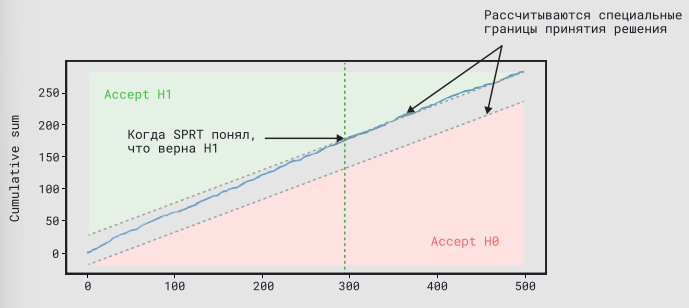

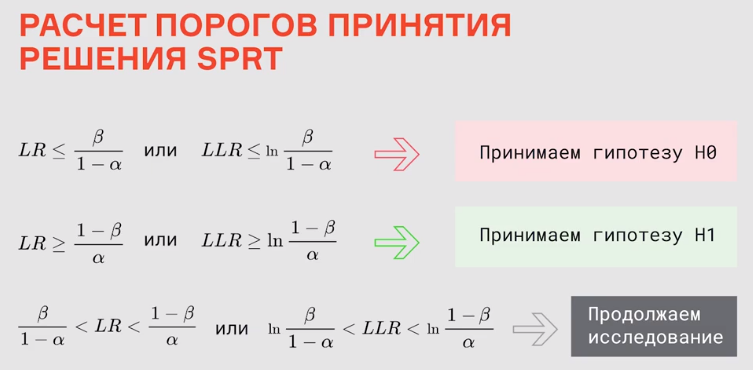

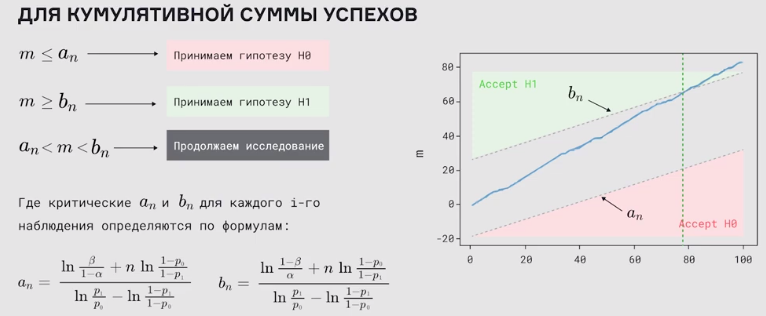

### SPRT о равенстве срелних
* Разница средних при случайном семплировании и росте размера выборки стремится к нормальному распределени.
* Поэтому можно проверить с помощью SPRT гипотезу о равенстве разницы средних нулю (H0) или фиксированной абсолютной разнице (для простоты будем ее называть MDE).
$$ H_0: \mu_2 - \mu_1 = 0$$
$$ H_1: \mu_2 - \mu_1 = \theta_1 > 0$$

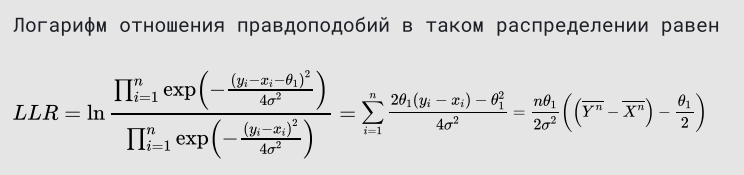

***Пороги в SPRT гипотезы о равенстве средних:***

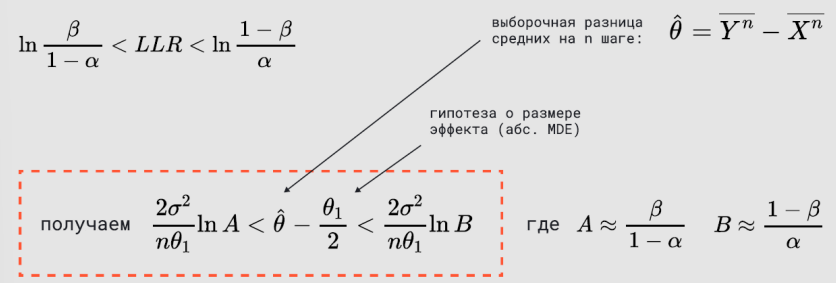

Пороги пересчитываются по мере накопления n и постепенно сближаются.

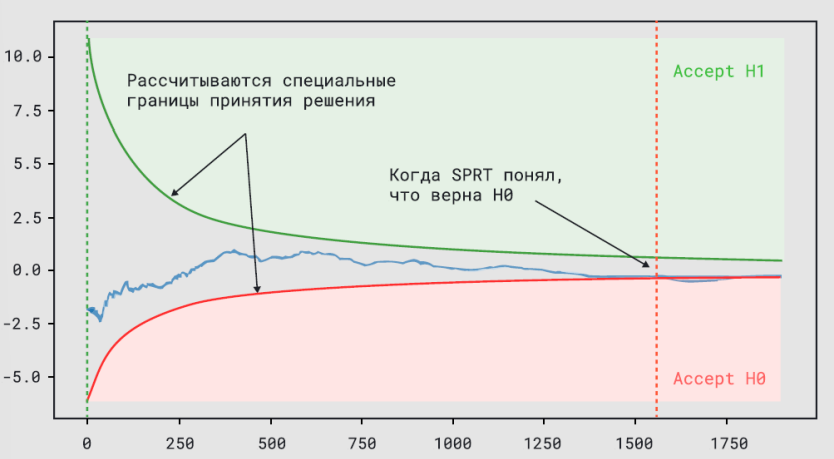

Другой важный плюс - это ***ускорение принятия решения***.

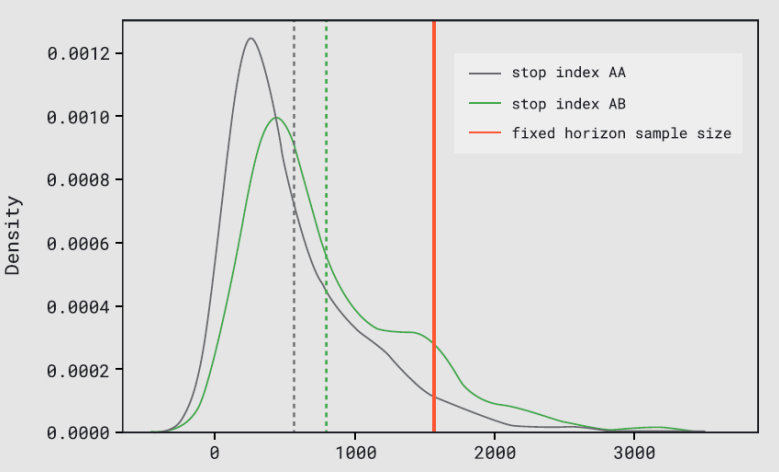

***Факторы, которые влияют на скорость остановки SPRT-теста:***
* Размер заложенного в SPRT MDE - Чем больший размер эффекта SPRT ожидает увидеть в альтернативном правдоподобии, тем быстрее принимает решение, что верна H0, если поступают данные без эффекта
* Близость наблюдаемого эффекта к $H_0$ или $H_1$ - если мы получаем данные ближе к одному из этих двух вариантов, SPRT достаточно быстро по отношению правдоподобий понимает, кто победил, но если данные с наблюдаемым эффектом, равноудаленным от $H_0$ и $H_1$, то SPRT не может определиться

***Плюсы SPRT:***
* позволяет честно подглядывать в тест
* ускоряет тест
* есть вариант и для конверсий, и для непрерывных данных

***Минусы:***
* проверяет только простые гипотезы (когда есть точноепредположение об альтернативном параметре)
* не гарантирует фиксированный размер выборки
* не так просто применить, тяжело переключиться с классического взгляда на эксперименты

## Практика:

In [45]:
import abc
import math
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import pandas as pd
import seaborn as sns
import sys
import statsmodels.stats.power as smp
from scipy import stats
import statsmodels.api as sm
import scipy.special
from tqdm.notebook import tqdm
from statsmodels.stats.power import tt_ind_solve_power
from scipy.stats import ttest_ind
from statsmodels.stats.proportion import proportion_confint

# Проблема подглядывания

In [2]:
days = 100
mu_control, sigma_control, DAU_control = 100, 20, 100
mu_test, sigma_test, DAU_test = 100, 20, 100

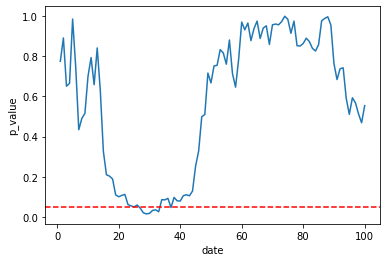

In [164]:
alpha = 0.05
current_date = 1
user_data = pd.DataFrame()
stat_result = pd.DataFrame()
daily_data = pd.DataFrame()

for day in range(days):
    daily_data_control = np.random.normal(mu_control, sigma_control, DAU_control)
    daily_data_experiment = np.random.normal(mu_test, sigma_test, DAU_test)
    
    day_data_control = pd.DataFrame({'value': daily_data_control})
    day_data_control['date'] = current_date
    day_data_control['group'] = 'control'

    
    day_data_experiment = pd.DataFrame({'value': daily_data_experiment})
    day_data_experiment['date'] = current_date
    day_data_experiment['group'] = 'experiment'

    
    user_data = user_data.append(day_data_experiment).append(day_data_control)
    t_stat, p_value = stats.ttest_ind(user_data[user_data.group == 'experiment'].value, 
                          user_data[user_data.group == 'control'].value)

    
    stat_result = stat_result.append(pd.DataFrame({'t': [t_stat], 'p_value': [p_value], 'date': current_date}))
    
    
    current_data_stat = user_data.groupby(['group'], as_index=False).agg({'value': 'mean'})
    current_data_stat['date'] = current_date
    
    daily_data = daily_data.append(current_data_stat)
    
    current_date += 1
sns.lineplot(data=stat_result, x="date", y="p_value")
plt.axhline(0.05, ls='--', color='red')

In [133]:
stat_result

,t,p_value,date
0,0.850102,0.396295,1
0,0.252964,0.800426,2
0,-0.692106,0.489139,3
0,-0.598581,0.549622,4
0,-0.646363,0.518193,5
...,...,...,...
0,0.268807,0.788081,96
0,0.263195,0.792403,97
0,0.210939,0.832937,98
0,0.221917,0.824381,99


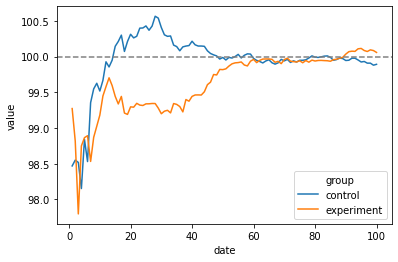

In [165]:
sns.lineplot(data=daily_data, x="date", y="value", hue='group')
plt.axhline(mu_control, ls='--', color='gray')

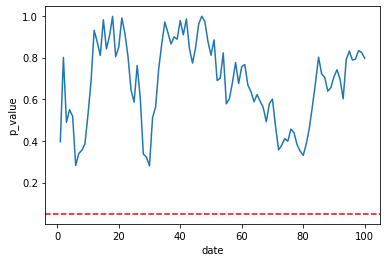

In [136]:
sns.lineplot(data=stat_result, x="date", y="p_value")
plt.axhline(0.05, ls='--', color='red')

# Правдоподобие и базовый SPRT с простой гипотезой

Text(1700.0, 83.15859746987806, 'Accept H0')

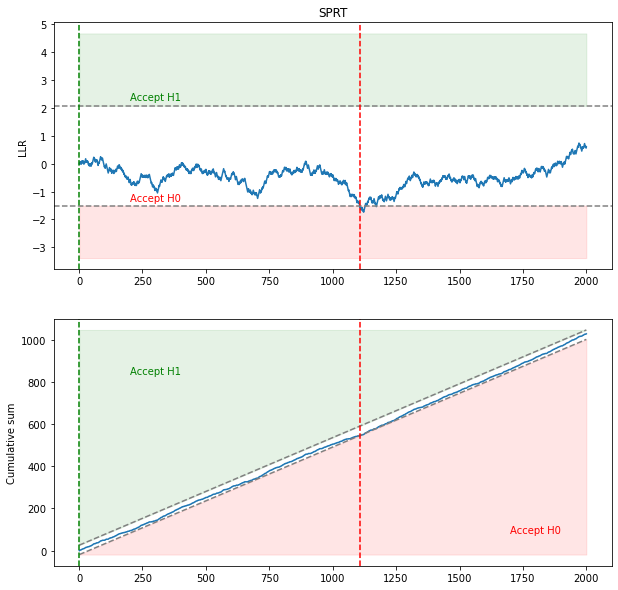

In [177]:
# Продемонстрируем как работает SPRT на простую гипотезу (четко заданы H0 и H1). Разберем кейс с долями
alpha = 0.1
beta = 0.2
p_0 = 0.5 # H0
p_1 = 0.52 # H1
sample_size = 2000
data_0 = np.random.binomial(1, p_0, sample_size) # получаем данные из H0 распределения
data_1 = np.random.binomial(1, p_1, sample_size) # получаем данные из H1 распределения

# Рассчитываем правдоподобие.
# Благо для распределения Бернулли его можно выразить через вероятность получить заданное кол-во успехов
# в биномиальном распределении за заданное кол-во шагов

L_1_list, L_2_list, cum_sum_list, LR_list, LLR_list, A_n_list, B_n_list = [], [], [], [], [], [], []

for i in range(sample_size):
    data = data_1[:i] # какие данные берем
    L_1 = stats.binom.pmf(data.sum(), len(data), p_0)
    L_2 = stats.binom.pmf(data.sum(), len(data), p_1)
    cum_sum = data.sum()
    LR = L_2 / L_1
    A_n = (np.log(beta / (1 - alpha)) + i*np.log((1-p_0) / (1-p_1))) / (np.log(p_1/p_0) - np.log((1- p_1)/(1-p_0)))
    B_n = (np.log((1-beta) / alpha) + i*np.log((1-p_0) / (1-p_1))) / (np.log(p_1/p_0) - np.log((1- p_1)/(1-p_0)))

    
    L_1_list.append(L_1)
    L_2_list.append(L_2)
    cum_sum_list.append(cum_sum)
    LR_list.append(LR)
    LLR_list.append(np.log(LR))
    A_n_list.append(A_n)
    B_n_list.append(B_n)

h0_bound = np.log(beta / (1 - alpha))
h1_bound = np.log((1-beta) / alpha)

early_stop_index_h1 = np.argmax(LLR_list > h1_bound)
early_stop_index_h0 = np.argmax(LLR_list < h0_bound)

# plot SPRT decission
fig, axes = plt.subplots(2, figsize=(10,10))

# LLR plot
sns.lineplot(ax=axes[0], x = np.arange(1, len(data_1)+1,1), y = LLR_list)
axes[0].axhline(h0_bound, ls='--', color='gray')
axes[0].axhline(h1_bound, ls='--', color='gray')
axes[0].axvline(early_stop_index_h1, ls='--', color='green')
axes[0].axvline(early_stop_index_h0, ls='--', color='red')
axes[0].text(x = sample_size * 0.1, y = h1_bound*1.1, s = 'Accept H1', color = 'green')
axes[0].text(x = sample_size * 0.1, y = h0_bound*0.9, s = 'Accept H0', color = 'red')
axes[0].set_ylabel(ylabel = "LLR")
axes[0].set_title('SPRT', fontsize = 12)
axes[0].fill_between(x = np.arange(1, len(data_1)+1,1), y1 = h1_bound, y2=h1_bound + 1.25 * abs(h1_bound), color = 'green', alpha = 0.1)
axes[0].fill_between(x = np.arange(1, len(data_1)+1,1), y1 = h0_bound, y2=h0_bound - 1.25 * abs(h0_bound), color = 'red', alpha = 0.1)

# cumsum plot
sns.lineplot(ax=axes[1], x = np.arange(1, len(data_1)+1,1), y = cum_sum_list)
sns.lineplot(ax=axes[1], x = np.arange(1, len(data_1)+1,1), y = A_n_list, ls='--', color='gray')
sns.lineplot(ax=axes[1], x = np.arange(1, len(data_1)+1,1), y = B_n_list, ls='--', color='gray')

axes[1].axvline(x = early_stop_index_h1, ls='--', color='green')
axes[1].set_ylabel(ylabel = "Cumulative sum")
axes[1].axvline(early_stop_index_h0, ls='--', color='red')
axes[1].fill_between(x = np.arange(1, len(data_1)+1,1), y1 = B_n_list, y2=np.max(B_n_list), color = 'green', alpha = 0.1)
axes[1].fill_between(x = np.arange(1, len(data_1)+1,1), y1 = np.min(A_n_list), y2= A_n_list, color = 'red', alpha = 0.1)
axes[1].text(x = sample_size * 0.1, y = np.max(B_n_list)*0.8, s = 'Accept H1', color = 'green')
axes[1].text(x = sample_size * 0.85, y = np.quantile(A_n_list, 0.1), s = 'Accept H0', color = 'red')


C:\Users\kazakov\AppData\Local\Temp/ipykernel_9308/1439638148.py:16: RuntimeWarning: invalid value encountered in double_scalars
  cum_mean = cum_sum = data.sum()/i


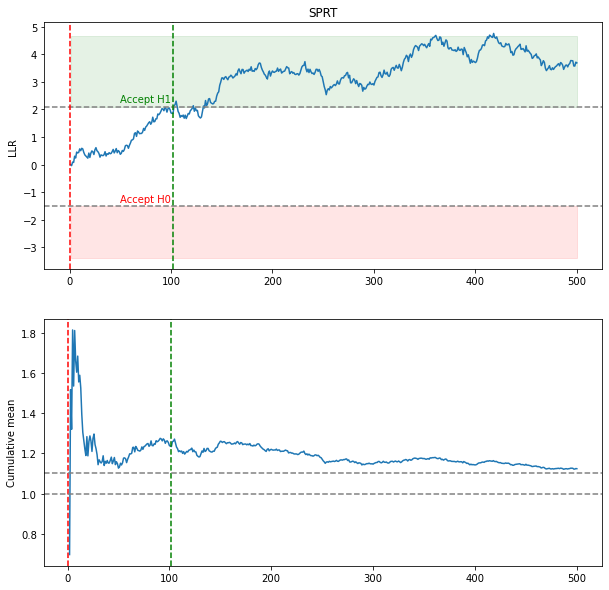

In [193]:
# вариант для нормального распределения
sample_size = 500
mean_0 = 1
mean_1 = 1.1
std = 1
data_0 = np.random.normal(mean_0, std, sample_size)
data_1 = np.random.normal(mean_1, std, sample_size)

L_0_list, L_1_list, LR_list, LLR_list, cum_mean_list = [], [], [], [], []

for i in range(sample_size):
    data = data_1[:i] # какие данные берем
    L_0 = np.prod(stats.norm.pdf(data, loc=mean_0, scale=1))
    L_1 = np.prod(stats.norm.pdf(data, loc=mean_1, scale=1))
    LR = L_1 / L_0
    cum_mean = cum_sum = data.sum()/i
    
    L_0_list.append(L_0)
    L_1_list.append(L_1)
    cum_mean_list.append(cum_mean)
    LR_list.append(LR)
    LLR_list.append(np.log(LR))

h0_bound = np.log(beta / (1 - alpha))
h1_bound = np.log((1-beta) / alpha)
    
early_stop_index_h1 = np.argmax(LLR_list > h1_bound)
early_stop_index_h0 = np.argmax(LLR_list < h0_bound)

# plot SPRT decision
fig, axes = plt.subplots(2, figsize=(10,10))

# LLR plot
sns.lineplot(ax=axes[0], x = np.arange(1, len(data_1)+1,1), y = LLR_list)
axes[0].axhline(h0_bound, ls='--', color='gray')
axes[0].axhline(h1_bound, ls='--', color='gray')
axes[0].axvline(early_stop_index_h1, ls='--', color='green')
axes[0].axvline(early_stop_index_h0, ls='--', color='red')
axes[0].text(x = sample_size * 0.1, y = h1_bound*1.1, s = 'Accept H1', color = 'green')
axes[0].text(x = sample_size * 0.1, y = h0_bound*0.9, s = 'Accept H0', color = 'red')
axes[0].set_ylabel(ylabel = "LLR")
axes[0].set_title('SPRT', fontsize = 12)
axes[0].fill_between(x = np.arange(1, len(data_1)+1,1), y1 = h1_bound, y2=h1_bound + 1.25 * abs(h1_bound), color = 'green', alpha = 0.1)
axes[0].fill_between(x = np.arange(1, len(data_1)+1,1), y1 = h0_bound, y2=h0_bound - 1.25 * abs(h0_bound), color = 'red', alpha = 0.1)

# cum mean plot
sns.lineplot(ax=axes[1], x = np.arange(1, sample_size+1,1), y = cum_mean_list)
axes[1].axvline(x= early_stop_index_h0, ls='--', color='red')
axes[1].axvline(x = early_stop_index_h1, ls='--', color='green')
axes[1].set_ylabel(ylabel = "Cumulative mean")
axes[1].axhline(mean_0, ls='--', color='gray', label = 'H0 mean')
axes[1].axhline(mean_1, ls='--', color='gray', label = 'H1 mean')

#axes[1].text(x = sample_size * 0.1, y = np.max(B_n_list)*0.8, s = 'Accept H1', color = 'green')
#axes[1].text(x = sample_size * 0.85, y = np.quantile(A_n_list, 0.1), s = 'Accept H0', color = 'red')

- Как мы видим и для проверки простой гипотез о равенстве генеральной доли конкретному значению или для гипотезы о равенстве генеральной средней конкретному значению SPRT угадывает корректно.
- Эти варианты SPRT мы показывали для илюстрации самого принципа.
- Дальше перейдем для проверки гипотез о разницы средних определенному значению

# SPRT для разницы долей / средних

In [7]:
# создадим функцию проводящую тест на проверку гипотезы о равенстве долей с попощью SPRT
def get_decision_list_sprt_binom(values_A, values_B, alpha = 0.05, beta = 0.2, mde = 0.1):
    ''' Функция проводящая SPRT анализ для пропорций (долей, конверсий)
    values_A - массив значенений коверсии (0, 1) в группе А
    values_B - массив значенений коверсии (0, 1) в группе И
    alpha - уровень статзначимости, который выдерживает SPRT
    beta - уровень ошибки второго рода, который выдерживает SPRT
    mde - абсолютная разница между долями в двух группах, MDE проверяемый в SPRT
    
    return
    - early_stop_index: индекс на котором SPRT остановился и принял решение.
        Если по результатам всех наблюдений SPRT не смог принять решение возвращается len(data)
    - inference: какая гипотеза была принята по результатам SPRT
    - left_bound_list: массив границ для принятия решения. Длиной early_stop_index
    - right_bound_list: массив границ для принятия решения. Длиной early_stop_index
    - S_list: массив рассчитываемых значений отражающих изменение динамики разницы долей. Длиной early_stop_index
    - cum_diff_list: массив кумулятивной нарастающей разницы между долями в двух группах. Длиной early_stop_index    
    '''
    min_len = int(np.mean([len(values_A), len(values_B)]))
    A = math.log(beta/(1 - alpha))
    B = math.log((1 - beta)/alpha)
    p = (values_A.mean() + values_B.mean())/2 # генеральная доля по двум выборкам
    
    left_bound_list = []
    right_bound_list = []
    S_list = []
    cum_diff_list = []
    
    for i in range(100, min_len):
        p0_i = np.mean(values_A[0:i])
        p1_i = np.mean(values_B[0:i])
        
        #p = (p0_i + p1_i)/2
        
        disp = p * (1 - p)
        diff = p1_i - p0_i
        left_bound = 2 * disp * A / mde
        right_bound = 2 * disp *  B / mde
        
        S = (i + 1) * (diff - mde/2)
        
        left_bound_list.append(left_bound)
        right_bound_list.append(right_bound)
        S_list.append(S)
        cum_diff_list.append(diff)
        
        if S < left_bound:
            return {'early_stop_index':i, 'inference':'Accept H0', 'left_bound_list': left_bound_list, 'right_bound_list': right_bound_list, 'S_list': S_list, 'cum_diff_list':cum_diff_list}
        if S > right_bound:
            return {'early_stop_index':i, 'inference':'Accept H1', 'left_bound_list': left_bound_list, 'right_bound_list': right_bound_list, 'S_list': S_list, 'cum_diff_list':cum_diff_list}
    return {'early_stop_index':i, 'inference':'Continue', 'left_bound_list': left_bound_list, 'right_bound_list': right_bound_list, 'S_list': S_list, 'cum_diff_list':cum_diff_list}

Размер выборки для Fixed Horizon: 11790
mde_absolute: 0.0175
Средняя доля в группе А: 0.35. Средняя доля в группе B: 0.365
Наблюдаемая разница по всей группе: 0.01561
Вывод: Accept H1
На каком наблюдении сделан вывод: 5286
На каком наблюдении сделан вывод: 5286


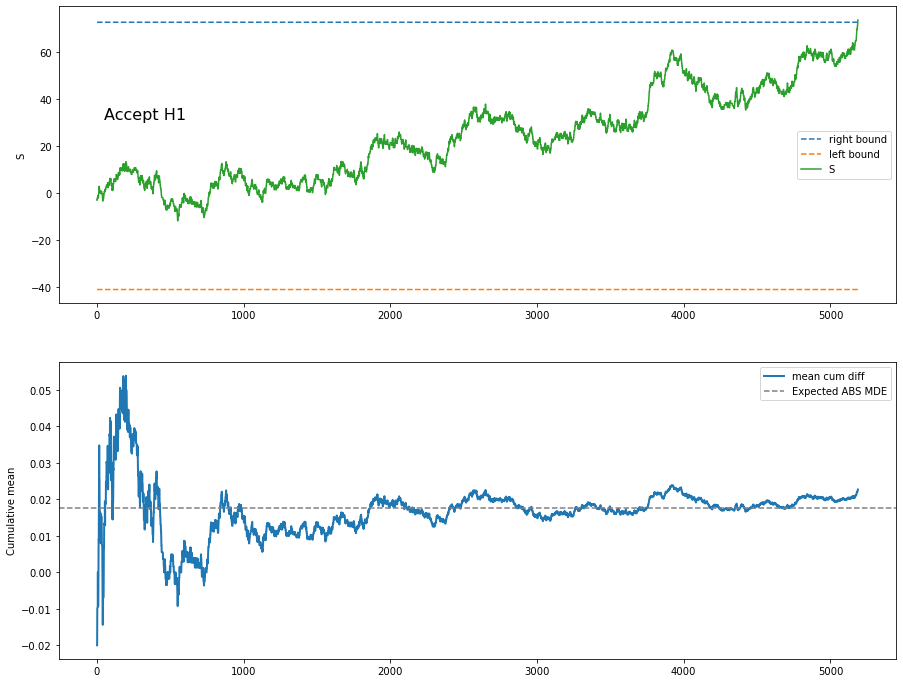

In [9]:
# определим размер выборки при Fixed Horizon для proportion тест 
h0 = 0.35
rel_mde = 0.05
h1 = h0 * (1+ rel_mde)
alpha = 0.05
beta = 0.2
mde_abs = h1 - h0

cohen_d = 2*math.asin(np.sqrt(h0)) - 2*math.asin(np.sqrt(h0 * (1+rel_mde))) 
n_obs = smp.zt_ind_solve_power(effect_size = cohen_d, 
                           alpha = alpha,
                           power = 1 - beta,
                           alternative='two-sided')
sample_size = round(n_obs)

print('Размер выборки для Fixed Horizon:', sample_size)
print('mde_absolute:', round(mde_abs, 4))

# сгенерируем данные с конверсией с h0 и h1 конверсиями (с размером выборок с запасом)
values_A = np.random.binomial(1, h0, sample_size*2) 
values_B = np.random.binomial(1, h1, sample_size*2) # вторая выборка с добавленным эффектом
print('Средняя доля в группе А: {}. Средняя доля в группе B: {}'.format(round(values_A.mean(),3), round(values_B.mean(), 3)))
print('Наблюдаемая разница по всей группе:',  round(values_B.mean() - values_A.mean(), 5))

# проводим SPRT тест на полученных данных
inference_object = get_decision_list_sprt_binom(values_A, values_B, alpha = 0.05, beta = 0.2, mde = mde_abs)
print('Вывод:', inference_object['inference'])
print('На каком наблюдении сделан вывод:', inference_object['early_stop_index'])

# plot SPRT decprint('Вывод:', inference_object['inference'])
print('На каком наблюдении сделан вывод:', inference_object['early_stop_index'])
fig, axes = plt.subplots(2, figsize=(15,12))

sns.lineplot(ax=axes[0], x = np.arange(1, len(inference_object['right_bound_list'])+1), y = inference_object['right_bound_list'], ls = '--', label='right bound')
sns.lineplot(ax=axes[0], x = np.arange(1, len(inference_object['left_bound_list'])+1), y = inference_object['left_bound_list'], ls = '--', label='left bound')
sns.lineplot(ax=axes[0], x = np.arange(1, len(inference_object['S_list'])+1), y = inference_object['S_list'], label='S')
axes[0].set_ylabel(ylabel = "S")
axes[0].text(y = np.quantile(inference_object['S_list'], 0.65), x = len(inference_object['S_list']) * 0.01, s = inference_object['inference'], fontsize = 16)
axes[0].legend()

sns.lineplot(ax=axes[1], x = np.arange(1, len(inference_object['right_bound_list'])+1), y = inference_object['cum_diff_list'], label='mean cum diff', linewidth=2)
axes[1].axhline(mde_abs, ls='--', color='gray', label = 'Expected ABS MDE')
axes[1].set_ylabel(ylabel = "Cumulative mean")
axes[1].legend()

Как видно на графике выше SPRT тест на разницу долей показывает ожидаемые результаты. Беглым взглядом мы видим, что принимаются правильные гипотезы и по выборкам меньшего размера. Позже проверим корерктность этих критериев на симуляциях АА и АБ

# SPRT на разницу средних

In [51]:
# создадим функцию проводящую тест на проверку гипотезы о  средних с попощью SPRT
def get_decision_list_sprt_normal(values_A, values_B, alpha = 0.05, beta = 0.2, mde = 1):
    ''' Функция проводящая SPRT анализ для разницы средних
    values_A - массив значенений коверсии (0, 1) в группе А
    values_B - массив значенений коверсии (0, 1) в группе B
    alpha - уровень статзначимости, который выдерживает SPRT
    beta - уровень ошибки второго рода, который выдерживает SPRT
    mde - абсолютная разница между средними в двух группах, MDE проверяемый в SPRT
    
    return
    - early_stop_index: индекс на котором SPRT остановился и принял решение.
        Если по результатам всех наблюдений SPRT не смог принять решение возвращается len(data)
    - inference: какая гипотеза была принята по результатам SPRT
    - h0_bound_list: массив границ для принятия решения. Длиной early_stop_index
    - h1_bound_list: массив границ для принятия решения. Длиной early_stop_index
    - S_list: массив рассчитываемых значений отражающих изменение динамики разницы долей. Длиной early_stop_index
    - cum_diff_list: массив кумулятивной нарастающей разницы между долями в двух группах. Длиной early_stop_index    
    '''
    
    min_len = int(np.mean([len(values_A), len(values_B)]))
    A = math.log(beta/(1 - alpha))
    B = math.log((1 - beta)/alpha)
    var = (values_B.var() + values_A.var()) / 2
    
    h0_bound_list = []
    h1_bound_list = []
    S_list = []
    cum_diff_list = []

    for i in range(100, min_len):
        mu_0_i = np.mean(values_A[0:i])
        mu_1_i = np.mean(values_B[0:i])

        #var = (values_B[0:i].var() + values_A[0:i].var()) / 2

        diff = mu_1_i - mu_0_i
        h0_bound = 2 * var * A / ((i + 1) * mde)
        h1_bound = 2 * var *  B / ((i + 1) * mde)

        S = (diff - mde/2)

        h0_bound_list.append(h0_bound)
        h1_bound_list.append(h1_bound)
        S_list.append(S)
        cum_diff_list.append(diff)
        
        if S < h0_bound:
            return {'early_stop_index':i, 'inference':'Accept H0', 'h0_bound_list': h0_bound_list, 'h1_bound_list': h1_bound_list, 'S_list': S_list, 'cum_diff_list':cum_diff_list}
        if S > h1_bound:
            return {'early_stop_index':i, 'inference':'Accept H1', 'h0_bound_list': h0_bound_list, 'h1_bound_list': h1_bound_list, 'S_list': S_list, 'cum_diff_list':cum_diff_list}
    return {'early_stop_index':i, 'inference':'Continue', 'h0_bound_list': h0_bound_list, 'h1_bound_list': h1_bound_list, 'S_list': S_list, 'cum_diff_list':cum_diff_list}

Text(0.5, 0, 'n')

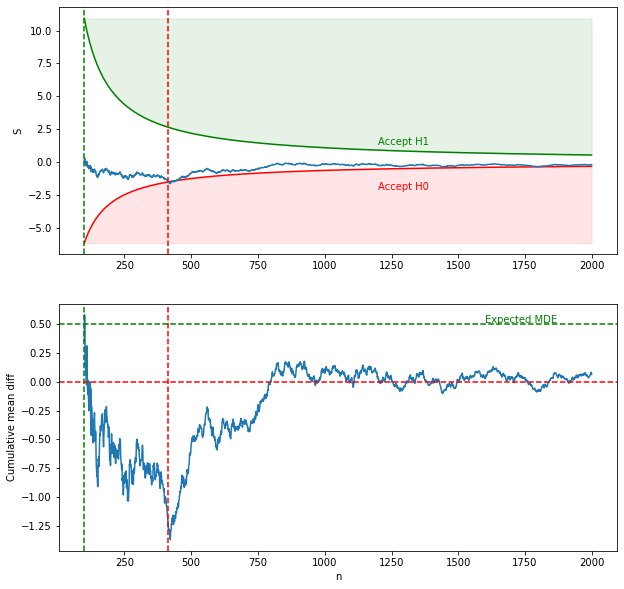

In [12]:
# проведем SPRT анализ для разницы средних
# подготовим данные
alpha = 0.05
beta = 0.2
mde = 0.5
sample_size = 2000
A = np.log(beta/(1 - alpha))
B = np.log((1 - beta)/alpha)
values_A, values_B = np.random.normal(100,10,sample_size), np.random.normal(100,10,sample_size)
min_len = int(np.mean([len(values_A), len(values_B)]))

var = (values_B.var() + values_A.var()) / 2


h0_bound_list = []
h1_bound_list = []
S_list = []
cum_diff_list = []

for i in range(100, min_len):
    mu_0_i = np.mean(values_A[0:i])
    mu_1_i = np.mean(values_B[0:i])
    
    diff = mu_1_i - mu_0_i
    h0_bound = 2 * var * A / ((i + 1) * mde)
    h1_bound = 2 * var *  B / ((i + 1) * mde)
    
    S = (diff - mde/2)

    h0_bound_list.append(h0_bound)
    h1_bound_list.append(h1_bound)
    S_list.append(S)
    cum_diff_list.append(diff)

early_stop_index_h1 = np.argmax(np.array(S_list) > np.array(h1_bound_list))
early_stop_index_h0 = np.argmax(np.array(S_list) < np.array(h0_bound_list))

# PLOT
# plot SPRT decision
fig, axes = plt.subplots(2, figsize=(10,10))

sns.lineplot(ax=axes[0], x = np.arange(100, len(h0_bound_list) + 100), y = h0_bound_list, color = 'red')
sns.lineplot(ax=axes[0], x = np.arange(100, len(h0_bound_list) + 100), y = h1_bound_list, color = 'green')
sns.lineplot(ax=axes[0], x = np.arange(100, len(h0_bound_list) + 100), y = S_list)
axes[0].axvline(x = early_stop_index_h1+100, ls='--', color='green')
axes[0].axvline(x = early_stop_index_h0+100, ls='--', color='red')
axes[0].text(x = sample_size * 0.6, y = np.quantile(h1_bound_list, 0.6), s = 'Accept H1', color = 'green')
axes[0].text(x = sample_size * 0.6, y = np.quantile(h0_bound_list, 0.1), s = 'Accept H0', color = 'red')
axes[0].fill_between(x = np.arange(100, min_len,1), y1 = h1_bound_list, y2=np.max(h1_bound_list), color = 'green', alpha = 0.1)
axes[0].fill_between(x = np.arange(100, min_len,1), y1 = np.min(h0_bound_list), y2=h0_bound_list, color = 'red', alpha = 0.1)
axes[0].set_ylabel(ylabel = "S")

sns.lineplot(ax=axes[1], x = np.arange(100, len(cum_diff_list) + 100), y = cum_diff_list)
axes[1].axvline(x = early_stop_index_h1+100, ls='--', color='green')
axes[1].axvline(x = early_stop_index_h0+100, ls='--', color='red')
axes[1].axhline(y = mde, ls='--', color='green')
axes[1].text(y = mde*1.03, x = sample_size*0.8, s = 'Expected MDE', color='green')
axes[1].axhline(y = 0, ls='--', color='red')
axes[1].set_ylabel(ylabel = "Cumulative mean diff")
axes[1].set_xlabel(xlabel = "n")

In [1227]:
# проведем тест с помощью готовой функции

Размер выборки Fixed Horizon под заданный MDE =  1571
Вывод: Accept H1
На каком наблюдении сделан вывод: 1002


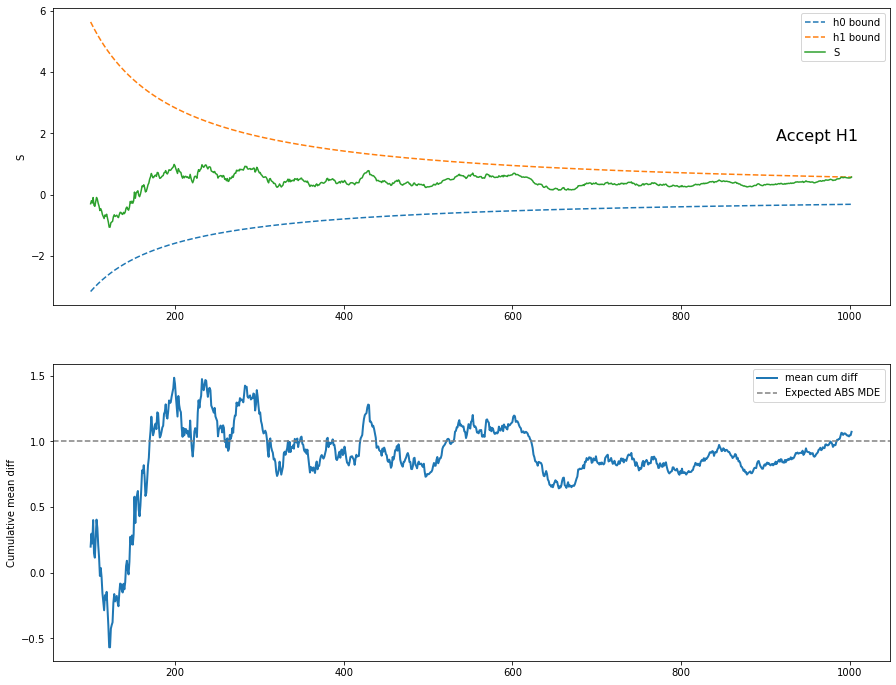

In [194]:
mean_control = 100
abs_mde = 1
std = 10
alpha = 0.05
beta = 0.2

cohen_d = abs_mde / std

sample_size = tt_ind_solve_power(effect_size = cohen_d, 
                       alpha = alpha, 
                       power = 1- beta, 
                       ratio = 1, 
                       alternative = "two-sided",
                       nobs1 = None)
sample_size = round(sample_size)
print('Размер выборки Fixed Horizon под заданный MDE = ', sample_size)

values_A, values_B = np.random.normal(mean_control,std,sample_size), np.random.normal(mean_control+abs_mde,std,sample_size)

inference_object = get_decision_list_sprt_normal(values_A, values_B, alpha = alpha, beta = beta, mde = abs_mde)

print('Вывод:', inference_object['inference'])
print('На каком наблюдении сделан вывод:', inference_object['early_stop_index'])

# plot SPRT decision
fig, axes = plt.subplots(2, figsize=(15,12))

sns.lineplot(ax=axes[0], x = np.arange(100, len(inference_object['h0_bound_list'])+100), y = inference_object['h0_bound_list'], ls = '--', label='h0 bound')
sns.lineplot(ax=axes[0], x = np.arange(100, len(inference_object['h1_bound_list'])+100), y = inference_object['h1_bound_list'], ls = '--', label='h1 bound')
sns.lineplot(ax=axes[0], x = np.arange(100, len(inference_object['S_list'])+100), y = inference_object['S_list'], label='S')
axes[0].set_ylabel(ylabel = "S")
axes[0].text(y = np.quantile(inference_object['h1_bound_list'], 0.75), x = len(inference_object['S_list']) * 0.9+100, s = inference_object['inference'], fontsize = 16)

axes[0].legend()

sns.lineplot(ax=axes[1], x = np.arange(100, len(inference_object['cum_diff_list'])+100), y = inference_object['cum_diff_list'], label='mean cum diff', linewidth=2)
axes[1].axhline(abs_mde, ls='--', color='gray', label = 'Expected ABS MDE')
axes[1].set_ylabel(ylabel = "Cumulative mean diff")
axes[1].legend()

# Проверка корректности SPRT критериев

## Проверки SPRT для разницы долей / конверсий

Размер выборки для Fixed Horizon: 11790
mde_absolute: 0.0175


  0%|          | 0/300 [00:00<?, ?it/s]

Доля случаев когда SPRT не успел принять решения до fixed horizon в АА варианте 0.043333333333333335
Доля случаев когда SPRT не успел принять решения до fixed horizon в AB варианте 0.043333333333333335
FP rate = 0.04666666666666667
FP 95% CI: (0.022798819769979963, 0.07053451356335337)
Power rate = 0.79
Power 95% CI: (0.7439095809539136, 0.8360904190460865)


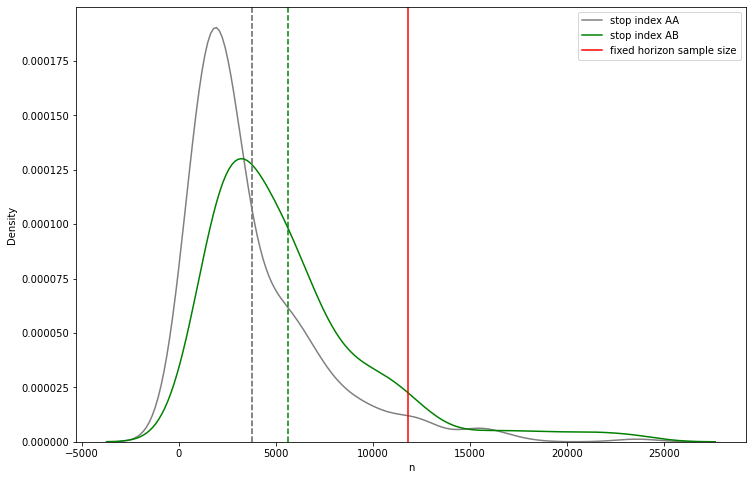

In [195]:
# определим размер выборки при Fixed Horizon для proportion тест 
h0 = 0.35
rel_mde = 0.05
h1 = h0 * (1+ rel_mde)
alpha = 0.05
beta = 0.2
mde_abs = h1 - h0

cohen_d = 2*math.asin(np.sqrt(h0)) - 2*math.asin(np.sqrt(h0 * (1+rel_mde))) 
n_obs = smp.zt_ind_solve_power(effect_size = cohen_d, 
                           alpha = alpha,
                           power = 1 - beta,
                           alternative='two-sided')
sample_size = round(n_obs)

print('Размер выборки для Fixed Horizon:', sample_size)
print('mde_absolute:', round(mde_abs, 4))

# проводим SPRT тест на полученных данных
inference_object = get_decision_list_sprt_binom(values_A, values_B, alpha = 0.05, beta = 0.2, mde = mde_abs)

inference_AA_list = []
inference_AB_list = []
stop_index_list_AA = []
stop_index_list_AB = []
diffs_list_AA = []
diffs_list_AB = []
sim_num = 300
for i in tqdm(range(sim_num)):
    # сгенерируем данные с конверсией с h0 и h1 конверсиями (с размером выборок с запасом)
    values_A1 = np.random.binomial(1, h0, sample_size*2) 
    values_A2 = np.random.binomial(1, h0, sample_size*2) 
    values_B = np.random.binomial(1, h1, sample_size*2) # выборка с добавленным эффектом
    
    inference_object_AA = get_decision_list_sprt_binom(values_A1, values_A2, alpha = 0.05, beta = 0.2, mde = mde_abs)
    inference_object_AB = get_decision_list_sprt_binom(values_A1, values_B, alpha = 0.05, beta = 0.2, mde = mde_abs)
    
    inference_AA = inference_object_AA['inference']
    inference_AB = inference_object_AB['inference']
    stop_index_AA = inference_object_AA['early_stop_index']
    stop_index_AB = inference_object_AB['early_stop_index']
    
    inference_AA_list.append(inference_AA)
    inference_AB_list.append(inference_AB)
    stop_index_list_AA.append(stop_index_AA)
    stop_index_list_AB.append(stop_index_AB)

FP = (np.array(inference_AA_list)=='Accept H1').sum() / sim_num
FP_CI = proportion_confint((np.array(inference_AA_list)=='Accept H1').sum() , sim_num, alpha=0.05)
power = (np.array(inference_AB_list)=='Accept H1').sum() / sim_num
power_CI = proportion_confint((np.array(inference_AB_list)=='Accept H1').sum() , sim_num, alpha=0.05)

print('Доля случаев когда SPRT не успел принять решения до fixed horizon в АА варианте', (np.array(stop_index_list_AA) > sample_size).mean())
print('Доля случаев когда SPRT не успел принять решения до fixed horizon в AB варианте',(np.array(stop_index_list_AA) > sample_size).mean())
print('FP rate =', FP)
print('FP 95% CI:', FP_CI)
print('Power rate =', power)
print('Power 95% CI:', power_CI)

# распределение времени остановки теста на конверсии с относительным MDE 5%
plt.figure(figsize = (12, 8))
sns.kdeplot(stop_index_list_AA, label = 'stop index AA', color = 'grey')
sns.kdeplot(stop_index_list_AB, label = 'stop index AB', color = 'green')
plt.axvline(x = np.mean(stop_index_list_AA), ls = '--', color = 'grey')
plt.xlabel('n')
plt.axvline(x = np.mean(stop_index_list_AB), ls = '--', color = 'green')
plt.axvline(x = sample_size, label = 'fixed horizon sample size', color = 'red')
plt.axvline(x = np.mean(stop_index_list_AA), ls = '--', color = 'grey')
plt.legend()

- Как мы видим данный способ показывает корректные альфа и бета для проверки гипотез о равенстве долей
- При этом размер выборки необходимый для принятия решения как правило в 2-3 раза ниже чем в fixed horizon
- Также есть небольшая доля случаев (7%), когда SPRT понадобилось больше наблюдений чем fixed horizon

## Проверки SPRT для разницы средних

Размер выборки для Fixed Horizon: 1571
mde_absolute: 0.0175


  0%|          | 0/300 [00:00<?, ?it/s]

Доля случаев когда SPRT не успел принять решения до fixed horizon в АА варианте 0.05
Доля случаев когда SPRT не успел принять решения до fixed horizon в AB варианте 0.05
FP rate = 0.06
FP 95% CI: (0.03312632778553523, 0.08687367221446476)
Power rate = 0.81
Power 95% CI: (0.7656077892528872, 0.8543922107471129)


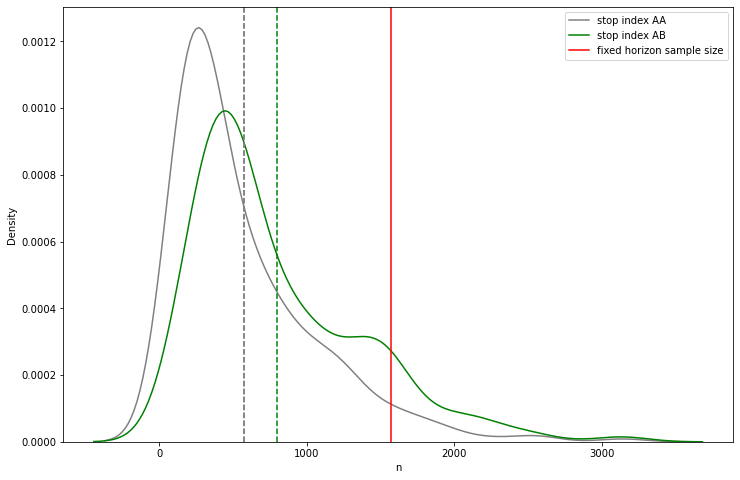

In [72]:
# определим размер выборки при Fixed Horizon для proportion тест 
mean_control = 100
abs_mde = 1
std = 10
alpha = 0.05
beta = 0.2

cohen_d = abs_mde / std

sample_size = tt_ind_solve_power(effect_size = cohen_d, 
                       alpha = alpha, 
                       power = 1- beta, 
                       ratio = 1, 
                       alternative = "two-sided",
                       nobs1 = None)
sample_size = round(sample_size)

print('Размер выборки для Fixed Horizon:', sample_size)
print('mde_absolute:', round(mde_abs, 4))

# проводим SPRT тест на полученных данных
inference_object = get_decision_list_sprt_binom(values_A, values_B, alpha = 0.05, beta = 0.2, mde = mde_abs)

inference_AA_list = []
inference_AB_list = []
stop_index_list_AA = []
stop_index_list_AB = []
diffs_list_AA = []
diffs_list_AB = []
sim_num = 300
for i in tqdm(range(sim_num)):
    # сгенерируем данные с конверсией с h0 и h1 конверсиями (с размером выборок с запасом)
    values_A1 = np.random.normal(mean_control, std, sample_size*2)
    values_A2 = np.random.normal(mean_control, std, sample_size*2)
    values_B = np.random.normal(mean_control + abs_mde, std,sample_size*2) # выборка с добавленным эффектом
    
    inference_object_AA = get_decision_list_sprt_normal(values_A1, values_A2, alpha = 0.05, beta = 0.2, mde = abs_mde)
    inference_object_AB = get_decision_list_sprt_normal(values_A1, values_B, alpha = 0.05, beta = 0.2, mde = abs_mde)
    
    inference_AA = inference_object_AA['inference']
    inference_AB = inference_object_AB['inference']
    stop_index_AA = inference_object_AA['early_stop_index']
    stop_index_AB = inference_object_AB['early_stop_index']
    
    inference_AA_list.append(inference_AA)
    inference_AB_list.append(inference_AB)
    stop_index_list_AA.append(stop_index_AA)
    stop_index_list_AB.append(stop_index_AB)

FP = (np.array(inference_AA_list)=='Accept H1').sum() / sim_num
FP_CI = proportion_confint((np.array(inference_AA_list)=='Accept H1').sum() , sim_num, alpha=0.05)
power = (np.array(inference_AB_list)=='Accept H1').sum() / sim_num
power_CI = proportion_confint((np.array(inference_AB_list)=='Accept H1').sum() , sim_num, alpha=0.05)

print('Доля случаев когда SPRT не успел принять решения до fixed horizon в АА варианте', (np.array(stop_index_list_AA) > sample_size).mean())
print('Доля случаев когда SPRT не успел принять решения до fixed horizon в AB варианте',(np.array(stop_index_list_AA) > sample_size).mean())
print('FP rate =', FP)
print('FP 95% CI:', FP_CI)
print('Power rate =', power)
print('Power 95% CI:', power_CI)

# распределение времени остановки теста на конверсии с относительным MDE 5%
plt.figure(figsize = (12, 8))
sns.kdeplot(stop_index_list_AA, label = 'stop index AA', color = 'grey')
sns.kdeplot(stop_index_list_AB, label = 'stop index AB', color = 'green')
plt.axvline(x = np.mean(stop_index_list_AA), ls = '--', color = 'grey')
plt.xlabel('n')
plt.axvline(x = np.mean(stop_index_list_AB), ls = '--', color = 'green')
plt.axvline(x = sample_size, label = 'fixed horizon sample size', color = 'red')
plt.axvline(x = np.mean(stop_index_list_AA), ls = '--', color = 'grey')
plt.legend()

- Как мы видим данный способ показывает корректные альфа и бета для проверки гипотез о равенстве средних
- При этом размер выборки необходимый для принятия решения как правило в 2-3 раза ниже чем в fixed horizon
- Также есть небольшая доля случаев (7%), когда SPRT понадобилось больше наблюдений чем fixed horizon

# Проверим как влияет размер эффекта и размер MDE на размер необходимой выборки в SPRT
Как м видели ранее SPRT обычно заканчивает раньше чем Fixed Horizon давайте посмотрим от чего это зависит

### Влияние размера MDE
Чем выше MDE заложенный в тест тем более контрастно выглядит отношение правдоподобия,  

In [99]:
rel_effect_linespace = np.arange(0.05, 0.30, 0.01)

FH_sample_size_list = []
global_stop_index_list_AA = []
global_stop_index_list_AB = []

for rel_effect in tqdm(rel_effect_linespace):
    # определим размер выборки при Fixed Horizon для proportion тест 
    h0 = 0.35
    rel_mde = rel_effect
    h1 = h0 * (1+ rel_mde)
    alpha = 0.05
    beta = 0.2
    mde_abs = h1 - h0
    print('Cohen_d for proportions', cohen_d)
    cohen_d = 2*math.asin(np.sqrt(h0)) - 2*math.asin(np.sqrt(h0 * (1+rel_mde))) 
    n_obs = smp.zt_ind_solve_power(effect_size = cohen_d, 
                               alpha = alpha,
                               power = 1 - beta,
                               alternative='two-sided')
    sample_size = round(n_obs)
    FH_sample_size_list.append(sample_size)

    print('Размер выборки для Fixed Horizon:', sample_size)
    print('mde_absolute:', round(mde_abs, 4))

    # проводим SPRT тест на полученных данных
    inference_object = get_decision_list_sprt_binom(values_A, values_B, alpha = 0.05, beta = 0.2, mde = mde_abs)

    stop_index_list_AA = []
    stop_index_list_AB = []
    diffs_list_AA = []
    diffs_list_AB = []
    
    sim_num = 100
    for i in range(sim_num):
        # сгенерируем данные с конверсией с h0 и h1 конверсиями (с размером выборок с запасом)
        values_A1 = np.random.binomial(1, h0, sample_size*2) 
        values_A2 = np.random.binomial(1, h0, sample_size*2) 
        values_B = np.random.binomial(1, h1, sample_size*2) # выборка с добавленным эффектом

        inference_object_AA = get_decision_list_sprt_binom(values_A1, values_A2, alpha = 0.05, beta = 0.2, mde = mde_abs)
        inference_object_AB = get_decision_list_sprt_binom(values_A1, values_B, alpha = 0.05, beta = 0.2, mde = mde_abs)

        stop_index_AA = inference_object_AA['early_stop_index']
        stop_index_AB = inference_object_AB['early_stop_index']

        stop_index_list_AA.append(stop_index_AA)
        stop_index_list_AB.append(stop_index_AB)

    FP = (np.array(inference_AA_list)=='Accept H1').sum() / sim_num
    FP_CI = proportion_confint((np.array(inference_AA_list)=='Accept H1').sum() , sim_num, alpha=0.05)
    power = (np.array(inference_AB_list)=='Accept H1').sum() / sim_num
    power_CI = proportion_confint(np.array(inference_AB_list=='Accept H1').sum() , sim_num, alpha=0.05)
    
    mean_stop_index_AA = np.mean(stop_index_list_AA)
    print(mean_stop_index_AA)
    mean_stop_index_AB = np.mean(stop_index_list_AB)
    
    global_stop_index_list_AA.append(mean_stop_index_AA)
    global_stop_index_list_AB.append(mean_stop_index_AB)

  0%|          | 0/25 [00:00<?, ?it/s]

Cohen_d for proportions -0.20753989416788698
Размер выборки для Fixed Horizon: 11790
mde_absolute: 0.0175
4748.23
Cohen_d for proportions -0.03648873169562239
Размер выборки для Fixed Horizon: 8205
mde_absolute: 0.021
2659.44
Cohen_d for proportions -0.043741107897453446
Размер выборки для Fixed Horizon: 6040
mde_absolute: 0.0245
2058.42
Cohen_d for proportions -0.05097946538780351
Размер выборки для Fixed Horizon: 4634
mde_absolute: 0.028
1411.52
Cohen_d for proportions -0.058204262242321336
Размер выборки для Fixed Horizon: 3668
mde_absolute: 0.0315
1109.48
Cohen_d for proportions -0.06541594943756346
Размер выборки для Fixed Horizon: 2977
mde_absolute: 0.035
899.06
Cohen_d for proportions -0.07261497115268467
Размер выборки для Fixed Horizon: 2465
mde_absolute: 0.0385
755.65
Cohen_d for proportions -0.0798017650606122
Размер выборки для Fixed Horizon: 2075
mde_absolute: 0.042
789.89
Cohen_d for proportions -0.08697676260928833
Размер выборки для Fixed Horizon: 1771
mde_absolute: 0.0

Text(0.5, 0, 'Relative effect (MDE)')

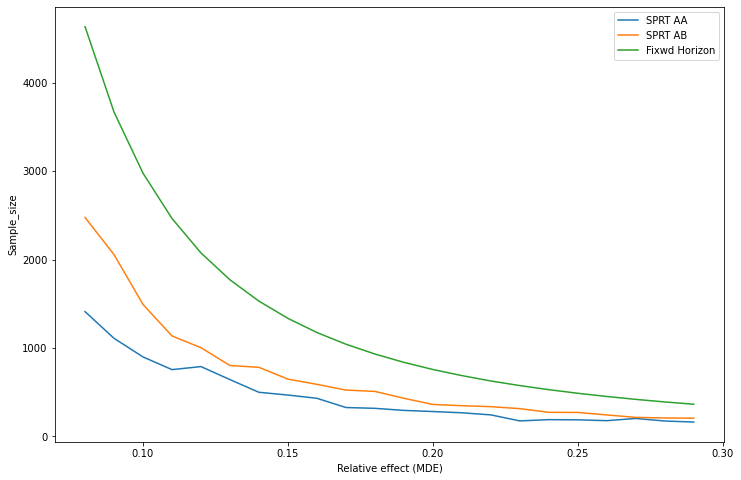

In [111]:
# график зависимости размера выборки в Fixed Horizon относительно среднего SPRT smple size
plt.figure(figsize = (12, 8))
sns.lineplot(x = rel_effect_linespace[3:], y = global_stop_index_list_AA[3:], label = 'SPRT AA')
sns.lineplot(x = rel_effect_linespace[3:], y = global_stop_index_list_AB[3:], label = 'SPRT AB')
sns.lineplot(x = rel_effect_linespace[3:], y = FH_sample_size_list[3:], label = 'Fixwd Horizon')
plt.ylabel(ylabel = 'Sample_size')
plt.xlabel(xlabel = 'Relative effect (MDE)')

Text(0.5, 0, 'Relative effect (MDE)')

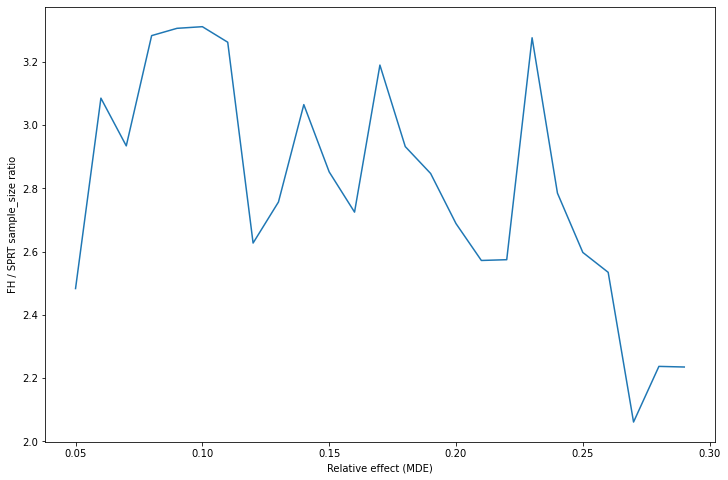

In [109]:
# график зависимости отношения размера выборки в Fixed Horizon относительно среднего SPRT smple size (во сколько раз быстрее SPRT)
plt.figure(figsize = (12, 8))
sns.lineplot(x = rel_effect_linespace, y = np.array(FH_sample_size_list) / np.array(global_stop_index_list_AA))
plt.ylabel(ylabel = 'FH / SPRT sample_size ratio')
plt.xlabel(xlabel = 'Relative effect (MDE)')

# Посмотрим эффект влияния на размер выборки в SPRT удаленности реального эффекта от H0 и H1

In [124]:
# определим размер выборки при Fixed Horizon для proportion тест 
mean_control = 100
abs_mde = 1
std = 10
alpha = 0.05
beta = 0.2

cohen_d = abs_mde / std

sample_size = tt_ind_solve_power(effect_size = cohen_d, 
                       alpha = alpha, 
                       power = 1- beta, 
                       ratio = 1, 
                       alternative = "two-sided",
                       nobs1 = None)
sample_size = round(sample_size)

print('Размер выборки для Fixed Horizon:', sample_size)
print('mde_absolute:', round(mde_abs, 4))

general_stop_index_list_AB = []

real_effect_linespace = np.arange(0, abs_mde*2, 0.1)
for real_effect in tqdm(real_effect_linespace):
    stop_index_list_AB = []

    sim_num = 300
    for i in range(sim_num):
        # сгенерируем данные с конверсией с h0 и h1 конверсиями (с размером выборок с запасом)
        values_A1 = np.random.normal(mean_control, std, sample_size*2)
        values_B = np.random.normal(mean_control + real_effect, std,sample_size*2) # выборка с добавленным эффектом

        inference_object_AB = get_decision_list_sprt_normal(values_A1, values_B, alpha = 0.05, beta = 0.2, mde = abs_mde)

        stop_index_AB = inference_object_AB['early_stop_index']

        stop_index_list_AB.append(stop_index_AB)
    mean_stop_index_AB = np.median(stop_index_list_AB)
    general_stop_index_list_AB.append(mean_stop_index_AB) 

Размер выборки для Fixed Horizon: 1571
mde_absolute: 0.1015


  0%|          | 0/20 [00:00<?, ?it/s]

Text(0.5, 0, '+ abs real effect')

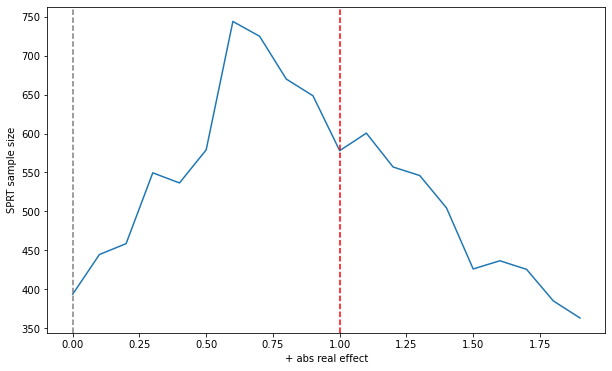

In [131]:
plt.figure(figsize = (10,6))
sns.lineplot(x = real_effect_linespace, y = general_stop_index_list_AB)
plt.axvline(x = abs_mde, ls = '--', color = 'red', label = 'expected MDE')
plt.axvline(x = 0, ls = '--', color = 'grey', label = 'NO effect (H0)')
plt.ylabel(ylabel = 'SPRT sample size')
plt.xlabel(xlabel = '+ abs real effect')